<A HREF="https://www.geeksforgeeks.org/emotion-classification-using-nrc-lexicon-in-python/">G4G Emotion Classification using NRC Lexicon</A><P>
    <A HREF="https://github.com/metalcorebear/NRCLex">NRC Lexicon</A>

In [1]:
#!pip3 install NRCLex
#!python3 -m textblob.download_corpora


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # for fancy interactive plot
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import os # to check if directory exists and create it if it doesn't
from datetime import datetime # to parse speech date
from nrclex import NRCLex
import spacy
import en_core_web_md
import csv
import regex as re
import plotly.graph_objects as go
import plotly.offline as pyo

In [50]:
# Load up the files
#path = './Data/DataUCSB/'
#path = './Data/amrhet/'
#list_of_files = []

#for root, dirs, files in os.walk(path):
#    for file in files:
#        if file.endswith('.txt'):
#            list_of_files.append(os.path.join(root,file))

list_of_files = ['./Data/speeches/2013-04-16-BostonMarathon.txt',
                 './Data/NYTimes/2013-04-16-BostonMarathon.txt', 
                 './Data/WSJ/2013-04-16-BostonMarathon.txt']
speeches = []
for file in list_of_files:
    with open(file, encoding='utf-8') as f:
        text = f.read()
    speeches.append(text)

In [51]:
emotions = []
for i in range(len(speeches)):
    emotions.append(NRCLex(speeches[i]))

In [52]:
emotions

Sr.	Method	Description<BR>
1	emotion.words 	        Return words list.<BR>
2	emotion.sentences	     Return sentences list.<BR>
3	emotion.affect_list	Return affect list.<BR>
4	emotion.affect_dict	Return affect dictionary.<BR>
5	emotion.raw_emotion_scores	Return raw emotional counts.<BR>
6	emotion.top_emotions	Return highest emotions.<BR>
7	emotion.affect_frequencies	Return affect frequencies.<BR>

In [53]:
[emotion.affect_frequencies for emotion in emotions] 

[{'fear': 0.07766990291262135,
  'anger': 0.019417475728155338,
  'anticip': 0.0,
  'trust': 0.20388349514563106,
  'surprise': 0.019417475728155338,
  'positive': 0.3300970873786408,
  'negative': 0.10679611650485436,
  'sadness': 0.06796116504854369,
  'disgust': 0.019417475728155338,
  'joy': 0.08737864077669903,
  'anticipation': 0.06796116504854369},
 {'fear': 0.16216216216216217,
  'anger': 0.11056511056511056,
  'anticip': 0.0,
  'trust': 0.11547911547911548,
  'surprise': 0.07125307125307126,
  'positive': 0.11302211302211303,
  'negative': 0.1891891891891892,
  'sadness': 0.08353808353808354,
  'disgust': 0.036855036855036855,
  'joy': 0.03194103194103194,
  'anticipation': 0.085995085995086},
 {'fear': 0.17209302325581396,
  'anger': 0.08837209302325581,
  'anticip': 0.0,
  'trust': 0.11162790697674418,
  'surprise': 0.06511627906976744,
  'positive': 0.11162790697674418,
  'negative': 0.19534883720930232,
  'sadness': 0.08837209302325581,
  'disgust': 0.05116279069767442,
  

In [54]:
import matplotlib
import matplotlib.pyplot as plt # pyplot has bar charts
%matplotlib notebook

<A HREF="https://matplotlib.org/cheatsheets/">Matplotlib cheat sheets</A>

<IPython.core.display.Javascript object>


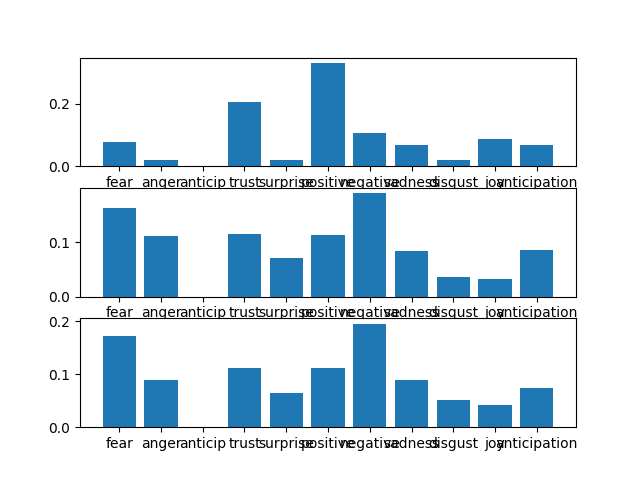

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
names = list(emotions[0].affect_frequencies.keys())

values0 = list(emotions[0].affect_frequencies.values())
ax1.bar(range(len(emotions[0].affect_frequencies)), values0, tick_label=names)

values1 = list(emotions[1].affect_frequencies.values())
ax2.bar(range(len(emotions[1].affect_frequencies)), values1, tick_label=names)

values2 = list(emotions[2].affect_frequencies.values())
ax3.bar(range(len(emotions[2].affect_frequencies)), values2, tick_label=names)

plt.show()

<IPython.core.display.Javascript object>


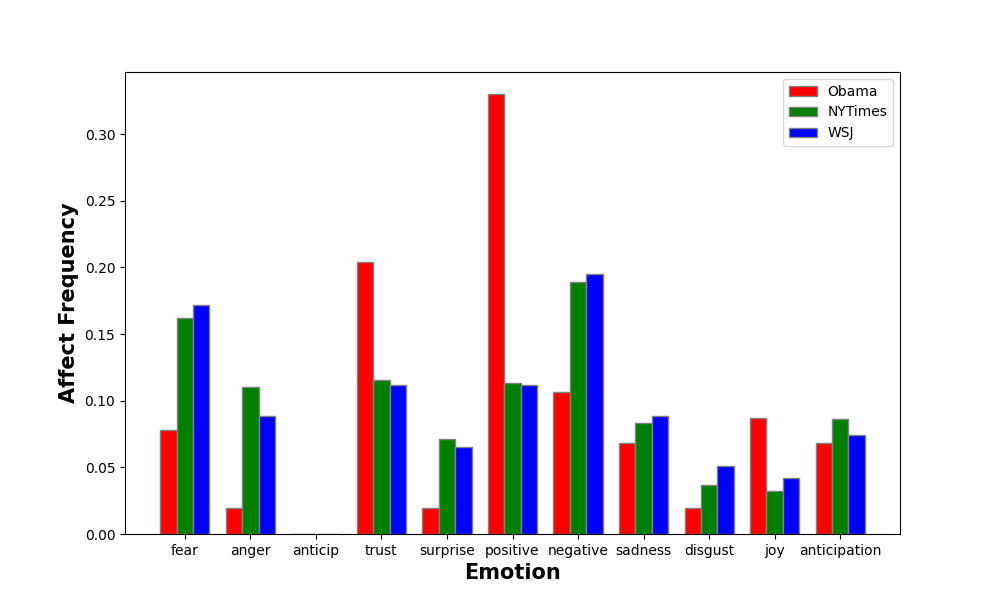

In [56]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
#
names = list(emotions[0].affect_frequencies.keys())
# Values
values0 = list(emotions[0].affect_frequencies.values()) # Obama
values1 = list(emotions[1].affect_frequencies.values()) # NYTimes
values2 = list(emotions[2].affect_frequencies.values()) # WSJ

# Set position of bar on X axis
br1 = np.arange(len(emotions[0].affect_frequencies))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, values0, color ='r', width = barWidth,
        edgecolor ='grey', label ='Obama')
plt.bar(br2, values1, color ='g', width = barWidth,
        edgecolor ='grey', label ='NYTimes')
plt.bar(br3, values2, color ='b', width = barWidth,
        edgecolor ='grey', label ='WSJ')

# Adding Xticks
plt.xlabel('Emotion', fontweight ='bold', fontsize = 15)
plt.ylabel('Affect Frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(emotions[0].affect_frequencies))],names)

plt.legend()
plt.show();

In [57]:
# Load Files
def getfilenames(path):
    list_of_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                list_of_files.append(os.path.join(root,file))
    return(list_of_files)


def loadfiles(path):
    list_of_files = getfilenames(path)
    texts = []
    returnlist = []
    for file in list_of_files:
        # There's something in a NYTimes file that needs iso-8859-1 encoding
        with open(file, encoding='iso-8859-1') as f:
            text = f.read()
        returnlist.append([re.sub('\.\/([^;]*)\/', '', file), text])
    returnlist = pd.DataFrame (returnlist, columns = ['file', 'text'])
    return(returnlist)

<A HREF="https://regexr.com/">RegExr</A><BR>
    <A HREF="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas cheat sheet</A>

In [58]:
# Radar Plot of emotions of the one event
# https://fcpython.com/visualisation/radar-charts-matplotlib
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
Attributes = list(emotions[0].affect_frequencies.keys())
del Attributes[2] # Remove 'anticip' which seems to always be 0
AttNo = len(emotions[0].affect_frequencies.keys())-1

In [60]:
# Obama
values0 = list(emotions[0].affect_frequencies.values())
del values0[2]  # Remove 'anticip' which seems to always be 0
values0 += values0 [:1]

In [61]:
# NYTimes
values1 = list(emotions[1].affect_frequencies.values())
del values1[2] # Remove 'anticip' which seems to always be 0
values1 += values1 [:1]

In [62]:
# WSJ
values2 = list(emotions[2].affect_frequencies.values())
del values2[2] # Remove 'anticip' which seems to always be 0
values2 += values2 [:1]

In [63]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

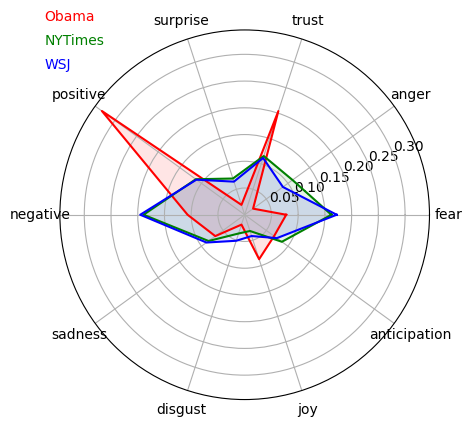

In [65]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
#Fill in the area plotted in the last line
ax.plot(angles,values0, 'red')
ax.fill(angles, values0, 'red', alpha=0.1)

ax.plot(angles,values1, 'green')
ax.fill(angles, values1, 'green', alpha=0.1)

ax.plot(angles,values2, 'blue')
ax.fill(angles, values2, 'blue', alpha=0.1)

#Give the plot a title and show it
plt.figtext(0.2,0.9,"Obama",color="red")
plt.figtext(0.2,0.85,"NYTimes",color="green")
plt.figtext(0.2,0.8,"WSJ",color="blue")
plt.show()

In [66]:
# Try in plotly to match other plots

categories = Attributes
categories = [*categories, categories[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=values0, theta=categories, name='Obama'),
        go.Scatterpolar(r=values1, theta=categories, name='NYTimes'),
        go.Scatterpolar(r=values2, theta=categories, name='WSJ')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Emotion comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

<A HREF="https://plotly.com/python/radar-chart/">Plotly radar charts</A>

# Try some time series now

In [67]:
# Load up the files
nytPath='/home/muddy/Documents/teamBlauweKater/NYTimes'
wsjPath='/home/muddy/Documents/teamBlauweKater/WSJ'
obaPath='/home/muddy/Documents/teamBlauweKater/speeches'
nytFiles=[]
wsjFiles=[]
obaFiles=[]
def getFiles(path):
    filesList=[]
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                filesList.append(file)
    return(filesList)

nytFiles=getFiles(nytPath)
wsjFiles=getFiles(wsjPath)
obaFiles=getFiles(obaPath)

nytFiles.sort(reverse=False)
wsjFiles.sort(reverse=False)
obaFiles.sort(reverse=False)

In [68]:
# loadfiles is a function that is defined above
oba = loadfiles('./Data/speeches/')
nyt = loadfiles('./Data/NYTimes/')
wsj = loadfiles('./Data/WSJ/')

oba.sort_values(by=['file'], ascending=True, ignore_index=True, inplace=True)
nyt.sort_values(by=['file'], ascending=True, ignore_index=True, inplace=True)
wsj.sort_values(by=['file'], ascending=True, ignore_index=True, inplace=True)

tmp = pd.merge(wsj, nyt, how='inner', on='file', suffixes=('_wsj', '_nyt'))
df  = pd.merge(oba, tmp, how='inner', on='file', suffixes=('_oba', ''))
df=df.rename(columns={"text": "text_oba"})

df['emo_oba'] = [NRCLex(text) for text in df['text_oba']]
df['emo_nyt'] = [NRCLex(text) for text in df['text_nyt']]
df['emo_wsj'] = [NRCLex(text) for text in df['text_wsj']]

In [69]:
# make a date column from files names
df['date'] = df['file'].str.slice(start=0, stop=10)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [71]:
# Hijacking this cell to export a copy of the neatly organized df, without the embeddings
no_emo_data = df.iloc[:,0:4].join(df.iloc[:,7])
#no_emo_data.to_csv('./Data/genData/nonEmotiondata.csv')

In [72]:
# Get names of emotion attributes, locate and remove anticipation as it seems to alway be 0
Attributes = list(emotions[0].affect_frequencies.keys())
antIndx = Attributes.index('anticip')
AttNo = len(emotions[0].affect_frequencies.keys())-1
Attributes

['fear',
 'anger',
 'anticip',
 'trust',
 'surprise',
 'positive',
 'negative',
 'sadness',
 'disgust',
 'joy',
 'anticipation']

Pandas indexing<P>
    Dataframe.[ ] ; This function also known as indexing operator<BR>
    Dataframe.loc[ ] : This function is used for labels.<BR>
    Dataframe.iloc[ ] : This function is used for positions or integer based<BR>
    Dataframe.ix[] : This function is used for both label and integer based<P>
<A HREF="https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/">See this guide for examples</A>

In [73]:
# Make deep copy of df to play with
df2 = df.copy(deep=True)

In [74]:
# Make a column for emo values for each source and each emotion
# We could also try correlation between each of these columns and the econ/approval data

# use list() around the affect_frequencies.values() to get numbers in list form
# starting point: [list(emotion.affect_frequencies.values())[1] for emotion in df['emo_oba']]
indexes = [0,1,3,4,5,6,7,8,9,10] # skip 2 which is anticipation and seems to always be 0
sources = ['oba', 'nyt', 'wsj']


for source in sources:
    for i, attr in enumerate(Attributes):
        if not(i==2):
            df2[source+attr]=[list(emotion.affect_frequencies.values())[i] for emotion in df2['emo_'+source]]

df2.drop([df2.index[0]], inplace=True) # drop first obs, 2004, makes plots look better  

In [75]:
df2.head(3)

file  \
1  2008-06-04-ObamaNomination.txt   
2     2008-11-05-ObamaElected.txt   
3     2009-01-05-EconomyPlans.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [76]:
# Change pandas plotting backend to plotly - a little bit fancier - slightly interactive - hover and see!
pd.options.plotting.backend = "plotly"

'fear','anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'

In [77]:
df2.plot(x='date',
         y='obapositive',
         title='positive sentiment Obama speeches')

## <A HREF="https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0">Some nice time series plotting ideas</A>

In [30]:
# Saved a csv so we don't have to do the reshaping everytime, just start with this...
facetPlotData = pd.read_csv('./Data/genData/facetPlotData.csv')
facetPlotData['date'] = pd.to_datetime(facetPlotData['date'], format='%Y-%m-%d')
facetPlotData.shape # Should be (3000, 4) 

(3000, 4)

In [31]:
# Reshape emotion data into individual observations and store in new dataframe

# Remove 'anticip' from Attributes list
Attributes.pop(2)

# check column names - df2[df2.columns[pd.Series(df2.columns).str.startswith('oba')]]
sources = ['oba', 'nyt', 'wsj']
facetPlotData  = pd.DataFrame(columns=['date', 'source', 'emotion', 'emoValue'])

for i in range(len(df2)):
    for source in sources:
        for attr in Attributes:
            facetPlotData.loc[len(facetPlotData)] = [df2['date'].iloc[i], source, attr, df2[source+attr].iloc[i]]
            
facetPlotData['date'] = pd.to_datetime(facetPlotData['date'])
facetPlotData.shape # Should be (3000, 4) 

(3000, 4)

In [32]:
# Make sure 'anticip' and its associated 0s are gone, watch for 0s by trust too.
facetPlotData.head(10)

,date,source,emotion,emoValue
0,2008-06-04,oba,fear,0.095798
1,2008-06-04,oba,anger,0.055462
2,2008-06-04,oba,trust,0.159664
3,2008-06-04,oba,surprise,0.048739
4,2008-06-04,oba,positive,0.233613
5,2008-06-04,oba,negative,0.115966
6,2008-06-04,oba,sadness,0.042017
7,2008-06-04,oba,disgust,0.023529
8,2008-06-04,oba,joy,0.095798
9,2008-06-04,oba,anticipation,0.129412


In [33]:
# Give it 15ish seconds or so
# <seaborn.axisgrid.FacetGrid at 0x7efac9f911b0> comes up after about 10 seconds, the plots will follow later
times = facetPlotData.date.unique()
g = sns.FacetGrid(facetPlotData, col="source", row="emotion", height=4.2, aspect=1.9)
g.map(sns.barplot, "date", "emoValue", errorbar=None, order=times)

Error in callback <function flush_figures at 0x7f318b3d7eb0> (for post_execute):


KeyboardInterrupt: 

In [34]:
# Lets look at some of those goofy values

def findmax(sourcefm, emofm, printyn):
    '''
    Function to print date of maximum value of subset of data
    # sourcefm - source name (oba, nyt, wsj)
    # emofm - emotion name (fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation)
    # printyn = 0 or 1 to print text
    '''
    find = facetPlotData[(facetPlotData['source'] == sourcefm) & (facetPlotData['emotion'] == emofm)]
    result = find.loc[find['emoValue'].idxmax()]
    date = result['date'].strftime('%Y-%m-%d')
    print(date, round(result['emoValue'], 4))
    if printyn == 1:
        text = 'text_' + sourcefm
        print(df2.query('date == @date')[text])

In [35]:
# Tells pandas to print all the text when printing an article or speech not just a 50 character preview
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

In [36]:
findmax('oba', 'anger', 1)

2015-01-08 0.1636
77    I strongly condemn the horrific shooting at the offices of Charlie Hebdo magazine in Paris that has reportedly killed 12 people. Our thoughts and prayers are with the victims of this terrorist attack and the people of France at this difficult time. France is America's oldest ally and has stood shoulder to shoulder with the United States in the fight against terrorists who threaten our shared security and the world. Time and again, the French people have stood up for the universal values that generations of our people have defended. France and the great city of Paris where this outrageous attack took place offer the world a timeless example that will endure well beyond the hateful vision of these killers. We are in touch with French officials, and I have directed my administration to provide any assistance needed to help bring these terrorists to justice.\n
Name: text_oba, dtype: object


2015-01-08 This is Obama's statement on the Charlie Hebdo terrorist act in Paris, it uses language like 'strongly condemn the horrific shooting' and 'outrageous attack'

In [37]:
findmax('nyt', 'positive', 1)

2011-02-19 0.5
29    The Intel Corporation announced plans on Friday to build a $5 billion microprocessor plant in Arizona and hire 4,000 employees in the United States this year. The workers will focus on product development, research and design, the chief executive, Paul S. Otellini, said. Mr. Otellini disclosed the plans for the plant during a visit by President Obama to an Intel plant near Portland, Ore. The new plant will be located at the company's existing site in Chandler, Ariz.
Name: text_nyt, dtype: object


2011-02-19 This is the NY Times brief article on Intel's announcement that they would be building a new fab in AZ

In [38]:
findmax('wsj', 'negative', 0)

2010-05-07 0.4211


2010-05-07 this Wall Street Journal article reports on a stock sell off using language like 'stock market plunged Thursday in a harrowing five-minute selloff'.  We could do a deeper study on what makes this more negative than other articles on average.

In [39]:
findmax('oba', 'positive', 0)

2014-03-07 0.4107


2014-03-07 Obama's statement on Russia and Ukraine, not sure what makes this more positive. He does mention the cooperation of allies and authorizing sanctions. Maybe do a histogram of this vs other speeches, or maybe Correspondence Analysis to see what words occur more in this than would be expected.

In [40]:
(facetPlotData.query('source == "oba" and emotion == "anger"')
              .sort_values('emoValue', ascending=False)
              .head()
)

,date,source,emotion,emoValue
2281,2015-01-08,oba,anger,0.163636
211,2009-06-15,oba,anger,0.113475
1501,2013-01-16,oba,anger,0.111842
2581,2015-10-02,oba,anger,0.108696
1801,2013-09-11,oba,anger,0.105769


These plots are ripped off from<P>
<A HREF="https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0">8 Visualizations with Python to Handle Multiple Time-Series Data</A>

In [41]:
# One source at a time
data = facetPlotData.query('source == "wsj"') # oba, nyt, wsj

# extract color palette, the palette can be changed
# Same number of colors as number of Attributes
list_emo = list(set(Attributes))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_emo)).as_hex())

fig = go.Figure()
for d,p in zip(list_emo, pal):
    fig.add_trace(go.Scatter(x = data[data['emotion']==d]['date'],
                             y = data[data['emotion']==d]['emoValue'],
                             name = d,
                             line_color = p, 
                             fill=None)) 

fig.show()

In [42]:
# Could also do one emotion at a time and color by source

# emotion name (fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation)
emodata = facetPlotData.query('emotion == "joy"') # oba, nyt, wsj

# extract color palette, the palette can be changed
# Same number of colors as number of Attributes
list_source = list(set(facetPlotData['source']))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_source)).as_hex())

fig = go.Figure()
for d,p in zip(list_source, pal):
    fig.add_trace(go.Scatter(x = emodata[emodata['source']==d]['date'],
                             y = emodata[emodata['source']==d]['emoValue'],
                             name = d,
                             line_color = p, 
                             fill=None)) 

fig.show()

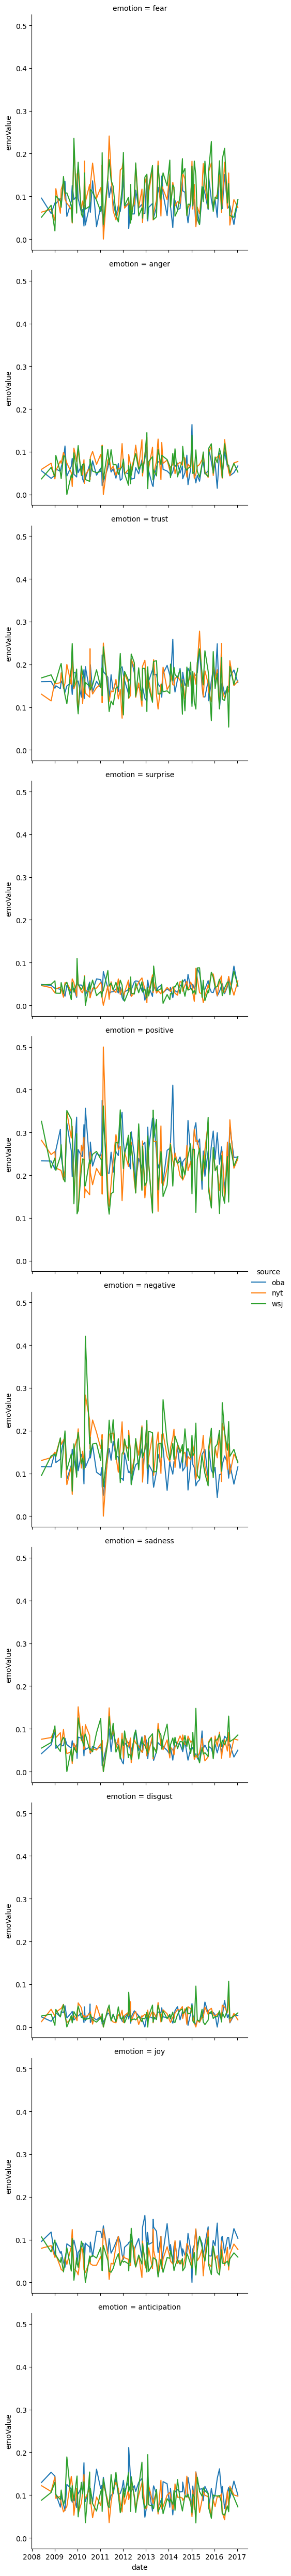

In [43]:
sns.relplot(data=facetPlotData, x="date", y="emoValue", hue="source", row="emotion", kind="line")

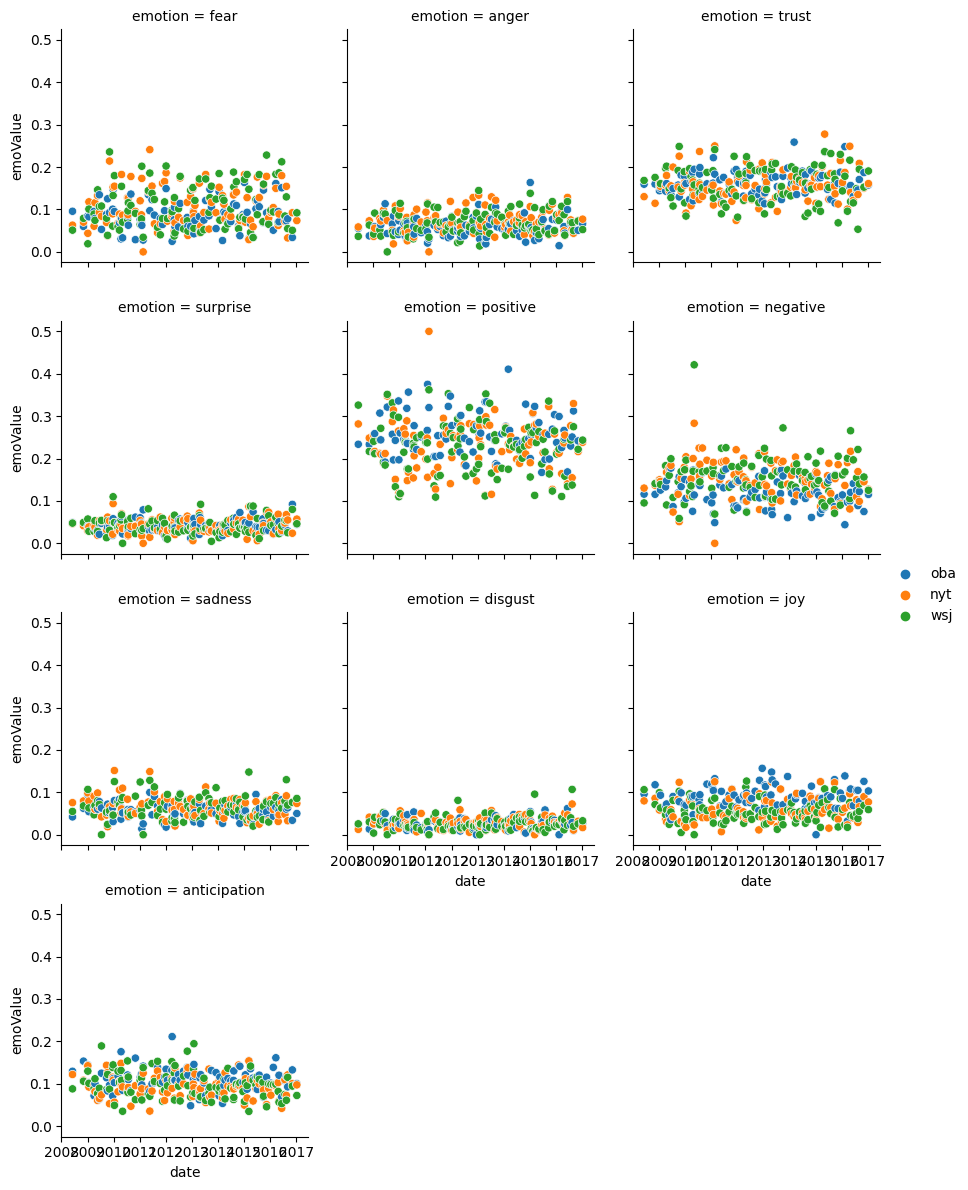

In [44]:
g = sns.FacetGrid(facetPlotData, col="emotion", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="date", y="emoValue", hue="source")
g.add_legend()

In [45]:
# Save to file so we don't have to start over every time
#facetPlotData.to_csv('./Data/genData/facetPlotData.csv', index=False)
facetPlotData = pd.read_csv('./Data/genData/facetPlotData.csv')

In [46]:
# Save the dataframe with texts and emotion values
# df2.to_csv('./Data/genData/fullEmotionData.csv', index=False)

# Need to cast date string to datetime object
df2 = pd.read_csv('./Data/genData/fullEmotionData.csv')
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')

In [47]:
print('\t',sources[0],'\t',sources[1],'\t',sources[2])
for attr in Attributes:
    print(attr,'\t',
          round(np.mean(facetPlotData.query('source == "oba" & emotion == @attr')['emoValue']), 3),'\t',
          round(np.mean(facetPlotData.query('source == "nyt" & emotion == @attr')['emoValue']), 3),'\t',
          round(np.mean(facetPlotData.query('source == "wsj" & emotion == @attr')['emoValue']), 3))
    print('\n')
        

	 oba 	 nyt 	 wsj
fear 	 0.085 	 0.106 	 0.106


anger 	 0.058 	 0.072 	 0.068


trust 	 0.162 	 0.157 	 0.159


surprise 	 0.042 	 0.041 	 0.042


positive 	 0.256 	 0.227 	 0.227


negative 	 0.12 	 0.153 	 0.155


sadness 	 0.056 	 0.064 	 0.065


disgust 	 0.026 	 0.028 	 0.027


joy 	 0.087 	 0.058 	 0.054


anticipation 	 0.109 	 0.094 	 0.097


